In [1]:
from statistics import mean, median, stdev
from scipy.stats import skew, kurtosis
import numpy as np
import random
import matplotlib.pyplot as plt

# Constants for the game setup
total_boxes = 25  # Total number of boxes in the game
bombs = 3  # Number of boxes containing bombs
# Prize amounts awarded at each step of opening a box successfully
prize_at_step = [10, 20, 30, 40, 50, 70, 100, 140, 190, 250, 320, 400, 490, 590, 700, 820, 950, 1100, 1300, 1600, 2000, 2500]

# Calculating the isolated probability of not hitting a bomb with each step
isolated_probabilities = []
for step in range(1, total_boxes - bombs + 1):
    # The chance of not hitting a bomb decreases as more boxes are opened
    chance_not_explode = (total_boxes - bombs) / total_boxes
    isolated_probabilities.append(chance_not_explode)
    # Reduce the total boxes as one is opened at each step
    total_boxes -= 1

def calculate_cumulative_chances(isolated_probabilities, initial_open_boxes):
    # Adjusts cumulative chances based on initial number of boxes already opened
    cumulative_chances_adjusted = [1] * initial_open_boxes  # Assume 100% chance for already opened boxes
    cumulative_chance = 1  # Initialize cumulative chance
    # Calculate cumulative chance of not exploding for subsequent boxes
    for chance in isolated_probabilities[initial_open_boxes:]:
        cumulative_chance *= chance
        cumulative_chances_adjusted.append(cumulative_chance)
    return cumulative_chances_adjusted

def calculate_expected_values(cumulative_chances, prize_at_step):
    # Calculates the expected value of opening each box
    expected_values = []
    for i, chance in enumerate(cumulative_chances):
        # Expected value = probability of success * reward
        expected_value = chance * prize_at_step[i]
        expected_values.append(expected_value)
    return expected_values

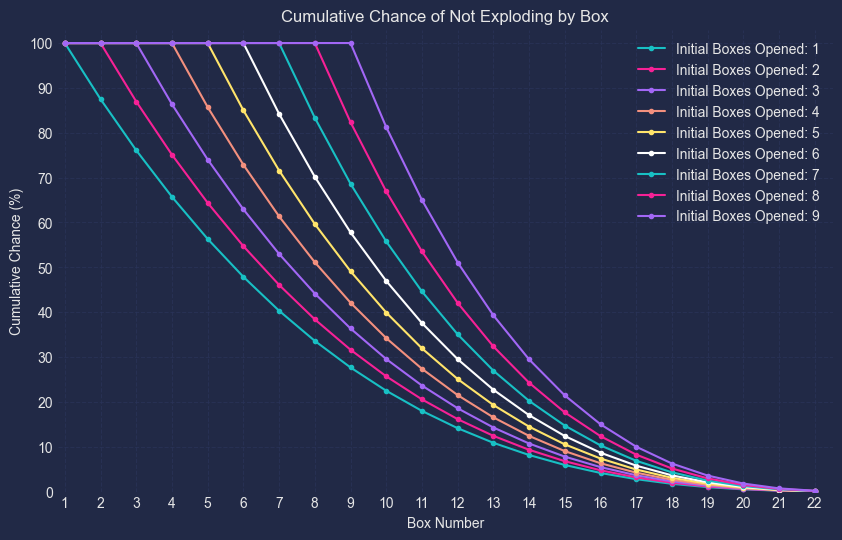

In [2]:
# Setting a custom style for the plots using an external stylesheet
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

plt.figure(figsize=(10, 6))  # Setting the size of the plot

# Plotting the cumulative chance of not exploding for various numbers of initially opened boxes
for initial_open_boxes in range(1, 10):
    # Calculate cumulative chances for the given number of initially opened boxes
    cumulative_chances = calculate_cumulative_chances(isolated_probabilities, initial_open_boxes)
    # Defining the x values (number of steps/boxes opened)
    x_values = range(1, 23)
    # Convert cumulative chances to percentages for better readability
    y_values = [chance * 100 for chance in cumulative_chances]
    # Plotting the line graph with a marker for each data point
    plt.plot(x_values, y_values, marker='.', label=f'Initial Boxes Opened: {initial_open_boxes}')

# Adding titles and labels for clarity
plt.title('Cumulative Chance of Not Exploding by Box')
plt.xlabel('Box Number')
plt.ylabel('Cumulative Chance (%)')
# Setting x and y axis ticks for better readability
plt.xticks(x_values)
plt.yticks(range(0, 101, 10))
# Adding a grid to the plot for easier data reading
plt.grid(linestyle='--', alpha=0.7)
# Setting the limits for the x and y axis to frame the data well
plt.xlim(0.8, 22.5)
plt.ylim(0, 103)
# Adding a legend to differentiate between the lines for each scenario of initially opened boxes
plt.legend(loc='upper right')
# Saving the plot as a PNG file with high resolution and tight layout
plt.savefig("Images/01 Cumulative Chances.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
# Display the plot
plt.show()

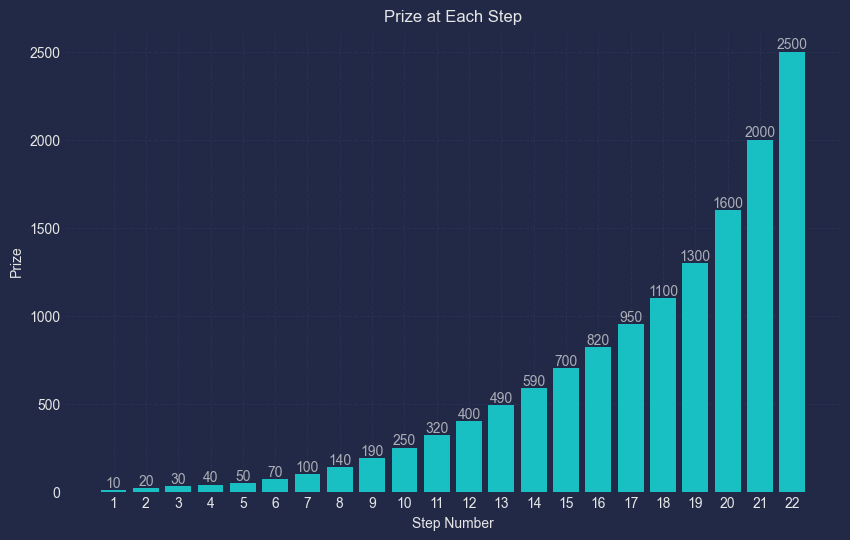

In [3]:
plt.figure(figsize=(10, 6))  # Initiates a new figure for plotting with specified dimensions

# Creates a bar plot for prize values at each step
x_values = range(1, len(prize_at_step) + 1)  # Defines the x-axis values, corresponding to each step
plt.bar(x_values, prize_at_step)  # Plots the bar graph with step numbers on x-axis and prize values on y-axis

# Adding the prize values as text labels above each bar for clarity
for i, value in enumerate(prize_at_step):
    # Places text at each bar's top, slightly offset for visibility; alpha value adjusts text transparency
    plt.text(x_values[i], value, f'{value}', ha='center', va='bottom', alpha=0.7)

# Setting titles and labels to enhance understanding of the plot's purpose
plt.title('Prize at Each Step')
plt.xlabel('Step Number')
plt.ylabel('Prize')

# Adjusting x-axis ticks to correspond to step numbers for easier interpretation
plt.xticks(x_values)
# Adding a grid to the background for better readability of the plot
plt.grid(linestyle='--', alpha=0.7)

# Saving the plot to a file; this is useful for documentation or sharing
plt.savefig("Images/02 Prize at step bar.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
# Displaying the plot to the user
plt.show()

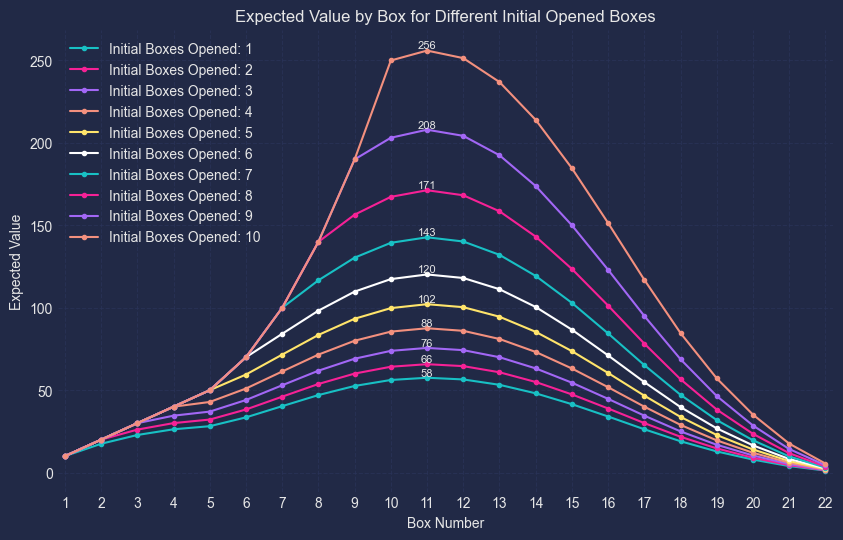

In [4]:
plt.figure(figsize=(10, 6))  # Initiating a new figure for the plot with specified dimensions

# Preparing to store the y-values for the 11th step across different initial conditions
y_values_at_x_11 = []

# Looping through different numbers of initially opened boxes to analyze their impact
for initial_open_boxes in range(1, 11):
    # Calculating cumulative chances for not hitting a bomb given the initial number of boxes opened
    cumulative_chances = calculate_cumulative_chances(isolated_probabilities, initial_open_boxes)
    # Calculating the expected values using the cumulative chances and prize amounts
    expected_values = calculate_expected_values(cumulative_chances, prize_at_step)
    # Setting up the x-axis values for plotting, corresponding to the step number
    x_values = range(1, len(expected_values) + 1)
    # Plotting the expected values for each scenario with a marker for clarity
    plt.plot(x_values, expected_values, marker='.', label=f'Initial Boxes Opened: {initial_open_boxes}')
    
    # Storing the expected value at the 11th step for each initial condition, if applicable
    if len(expected_values) >= 11:  # Ensures the index exists
        y_values_at_x_11.append(expected_values[10])  # Index 10 for the 11th item, due to zero-indexing
    else:
        y_values_at_x_11.append(None)

# Setting up plot titles and axis labels for clarity and context
plt.title('Expected Value by Box for Different Initial Opened Boxes')
plt.xlabel('Box Number')
plt.ylabel('Expected Value')

# Configuring the x-axis ticks to align with the box numbers
plt.xticks(x_values)
# Adding a grid to the plot for better data visualization
plt.grid(linestyle='--', alpha=0.7)
# Adjusting the plot's x-axis limits for a snug fit around the data
plt.xlim(0.8, len(prize_at_step) + 0.2)
# Adding a legend to differentiate between lines representing different initial conditions
plt.legend(loc='upper left')

# Annotating the plot with expected values at the 11th step, with an upward adjustment for visibility
for i, y in enumerate(y_values_at_x_11):
    if y is not None:  # Checks for a valid value before plotting
        # Places a text annotation on the plot, adjusted for better readability
        plt.text(11, y + 3, f'{y:.0f}', ha='center', va='center', fontsize=8)

# Saving the final visual as a PNG file with specified settings for resolution and layout
plt.savefig("Images/03 EVs plot new.png", dpi=300, bbox_inches='tight', pad_inches=0.1)
# Displaying the plot to the user
plt.show()

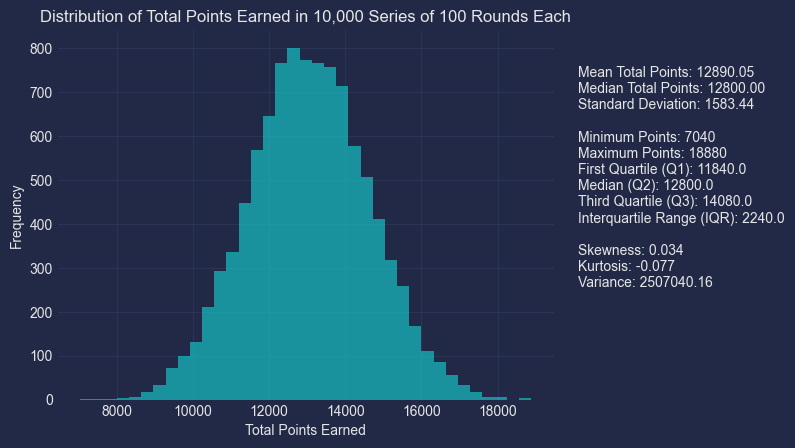

In [5]:
# Function to simulate a single series of n_rounds to understand the total points one can earn
def simulate_one_series(n_rounds=100):
    total_points_earned = 0  # Initialize total points earned in the series
    for _ in range(n_rounds):  # Loop through each round in the series
        initial_gifts = random.randint(1, 10)  # Randomly decide the number of gifts already opened at the start
        opened_gifts = initial_gifts  # Initialize the count of opened gifts
        # Iterate through the chances of not hitting a bomb after the initially opened gifts
        for chance in isolated_probabilities[initial_gifts:]:
            # If the random value is within the success chance, open another gift
            if random.random() <= chance:
                opened_gifts += 1  # Increment the opened gift count
                # If 11 gifts are opened, add the points for the 11th box and stop opening more boxes
                if opened_gifts == 11:
                    total_points_earned += prize_at_step[10]  # Add points for the 11th box
                    break
            else:
                break  # Stop opening boxes if a bomb is encountered
    return total_points_earned  # Return the total points earned in the series

n_series = 10000  # Number of series to simulate
# Simulate n_series of the game and store the total points earned in each series
total_points_each_series = [simulate_one_series() for _ in range(n_series)]

# Calculate various statistical measures to understand the distribution of total points earned
mean_points = mean(total_points_each_series)  # Average points earned across all series
median_points = median(total_points_each_series)  # Median points earned
std_dev_points = stdev(total_points_each_series)  # Standard deviation of points
min_points = min(total_points_each_series)  # Minimum points earned in any series
max_points = max(total_points_each_series)  # Maximum points earned

# Calculate the quartiles to understand the spread of the distribution
quartiles = [np.percentile(total_points_each_series, q) for q in [25, 50, 75]]
iqr = quartiles[2] - quartiles[0]  # Interquartile range

# Calculate skewness and kurtosis to understand the shape of the distribution
skewness = skew(total_points_each_series)
kurt = kurtosis(total_points_each_series)

# Calculate the variance for a more detailed understanding of distribution spread
variance = np.var(total_points_each_series)

# Formatting the calculated statistics into a string for display
stats_text = f"""
Mean Total Points: {mean_points:.2f}
Median Total Points: {median_points:.2f}
Standard Deviation: {std_dev_points:.2f}

Minimum Points: {min_points}
Maximum Points: {max_points}
First Quartile (Q1): {quartiles[0]}
Median (Q2): {quartiles[1]}
Third Quartile (Q3): {quartiles[2]}
Interquartile Range (IQR): {iqr}

Skewness: {skewness:.3f}
Kurtosis: {kurt:.3f}
Variance: {variance:.2f}
"""

# Plotting the histogram of total points earned across all simulated series
plt.hist(total_points_each_series, bins=37, alpha=0.7)
plt.xlabel('Total Points Earned')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.title('Distribution of Total Points Earned in 10,000 Series of 100 Rounds Each')  # Plot title

# Adding the statistical summary as text within the plot area for quick reference
plt.text(1.05, 0.6, stats_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')

# Saving the plot to a file with specific layout adjustments
plt.savefig("Images/04 Points Distribution in simulation.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

# Displaying the final plot
plt.show()